Tenemos un dataset con datos históricos de varias variables promediadas en valores diarios de 6 los últimos 6 años.

Se tiene el siguiente diccionario de datos:
- La columna de índice es la fecha.
- PresionAire: es la presión del aire en milibars
- PresionVapor: es la presión del vapor de agua en el aire en milibars
- Humedadrelativa: es el porcentaje de humedad relativa
- ConcentracionVapor: es la concentración del vapor de agua en mmol/mol
- DensidadAire: es la densidad del aire en g/metros cúbicos
- DireccionViento: es la dirección del viento en grados
- Temperatura: es la temperatura en grados centigrados

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import seaborn as sns

In [4]:
import tensorflow as tf
print(tf.__version__)

2.3.1


In [13]:
df = pd.read_csv("datos_clima.csv")

In [14]:
# Se verifica la carga
df

,Unnamed: 0,PresionAire (mbar),PresionVapor (mbar),HumedadRelativa (%),ConcentracionVapor (mmol/mol),DensidadAire (g/m**3),DireccionViento (grado),Temperatura (C)
0,01.01.2010,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
1,02.01.2010,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2,03.01.2010,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
3,04.01.2010,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
4,05.01.2010,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736
...,...,...,...,...,...,...,...,...
2188,27.12.2015,1002.411250,8.530347,79.140625,8.510764,1237.405625,190.177083,8.167083
2189,28.12.2015,1002.468194,7.347917,91.898611,7.329375,1257.736389,153.824792,3.761111
2190,29.12.2015,1003.816736,7.504514,94.815278,7.478403,1260.613194,187.764653,3.485625
2191,30.12.2015,998.772639,4.638125,67.657431,4.641250,1265.083611,178.779861,1.395694


In [15]:
# se verifican los tipos
df.dtypes

,Unnamed: 0,PresionAire (mbar),PresionVapor (mbar),HumedadRelativa (%),ConcentracionVapor (mmol/mol),DensidadAire (g/m**3),DireccionViento (grado),Temperatura (C)
0,01.01.2010,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
1,02.01.2010,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2,03.01.2010,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
3,04.01.2010,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
4,05.01.2010,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736
5,06.01.2010,976.819931,2.622847,85.312500,2.685417,1287.189583,147.704514,-9.056111
6,07.01.2010,983.508194,2.760625,85.053681,2.806458,1292.726528,181.507292,-8.386181
7,08.01.2010,989.723125,2.736528,90.784028,2.765069,1306.170417,54.412708,-9.456042
8,09.01.2010,984.620486,3.750694,90.971528,3.809167,1278.588333,31.430486,-5.278681
9,10.01.2010,985.603333,3.835069,92.395833,3.891319,1279.351875,57.721042,-5.180278


<h1>Preparación general de los datos

- Renombramiento de columnas
- Conversión de tipos fechas
- Ordenamiento de por fechas
- Redondeo de los valores
- Revisión de la calidad de los datos

In [20]:
df.columns = ['Fecha', 'P.Aire', 'P.Vapor', 'Hum.Rel', 'C.Vapor', 'D.Aire', 'D.Vapor', 'Temp']

In [24]:
# se cambia el tipo de la columna 0 a Date
df['Fecha'] = pd.to_datetime(df['Fecha'], format='%d.%m.%Y');
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2193 entries, 0 to 2192
Data columns (total 8 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Fecha    2193 non-null   datetime64[ns]
 1   P.Aire   2193 non-null   float64       
 2   P.Vapor  2193 non-null   float64       
 3   Hum.Rel  2193 non-null   float64       
 4   C.Vapor  2193 non-null   float64       
 5   D.Aire   2193 non-null   float64       
 6   D.Vapor  2193 non-null   float64       
 7   Temp     2193 non-null   float64       
dtypes: datetime64[ns](1), float64(7)
memory usage: 137.2 KB


In [22]:
# Ordenamiento del dataframe
df.sort_values(by=['Fecha'])

,Fecha,P.Aire,P.Vapor,Hum.Rel,C.Vapor,D.Aire,D.Vapor,Temp
0,2010-01-01,970.000208,4.348264,94.777778,4.483333,1252.657986,64.320278,-3.863403
1,2010-01-02,985.915486,3.793889,91.520833,3.849444,1280.425208,238.964236,-5.296667
2,2010-01-03,990.590625,4.049236,92.757639,4.087569,1283.044514,132.256944,-4.605903
3,2010-01-04,988.882014,3.467292,90.650694,3.505417,1289.135417,145.993472,-6.284306
4,2010-01-05,981.295347,2.385556,85.181528,2.431111,1299.386597,165.373125,-10.286736
...,...,...,...,...,...,...,...,...
2188,2015-12-27,1002.411250,8.530347,79.140625,8.510764,1237.405625,190.177083,8.167083
2189,2015-12-28,1002.468194,7.347917,91.898611,7.329375,1257.736389,153.824792,3.761111
2190,2015-12-29,1003.816736,7.504514,94.815278,7.478403,1260.613194,187.764653,3.485625
2191,2015-12-30,998.772639,4.638125,67.657431,4.641250,1265.083611,178.779861,1.395694


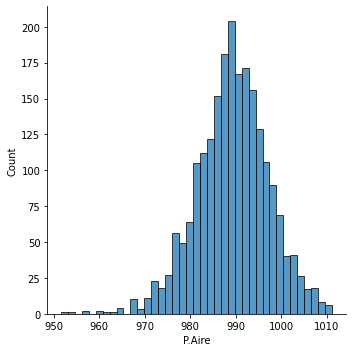

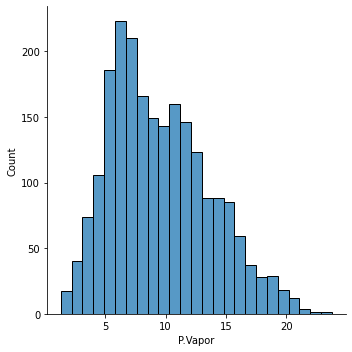

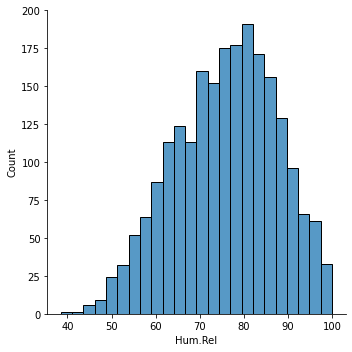

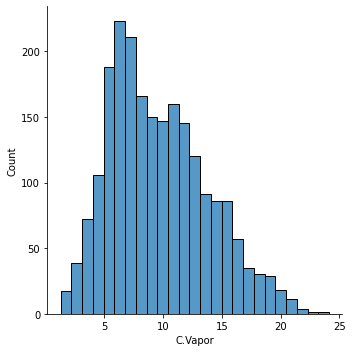

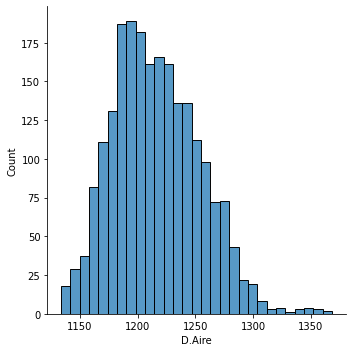

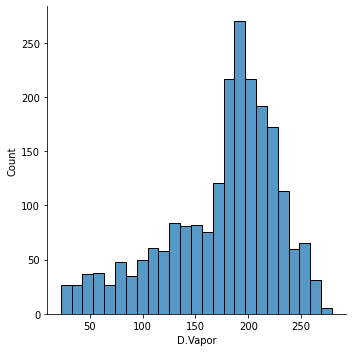

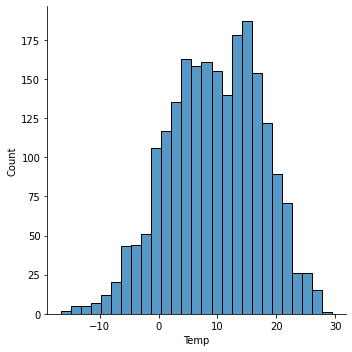

In [34]:
for col in df.columns[1:]:
    df[col] = df[col].round(decimals=2) # Redondeo de los valores a 2 decimales
    sns.displot(df, x=col)
    #sns.boxplot(data=df, y=col)

Se busca ahora comenzar a generar el corte transversal, haciendo variables promedio: 

In [7]:

pd.set_option('display.max_rows', 8)

In [1]:
# Media Movil para presión de aire
presionAire_30 = df['PresionAire (mbar)'].rolling(window=30).mean();
presionAire_30.plot();
print(presionAire_30)

NameError: name 'df' is not defined

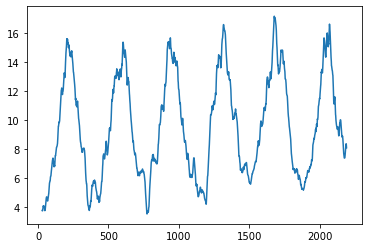

In [9]:
# Media Movil para presión de vapor
presionVapor_30 = df['PresionVapor (mbar)'].rolling(window=30).mean();
presionVapor_30.plot();

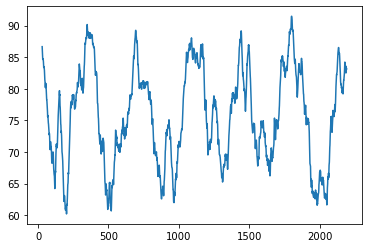

In [10]:
# Media Movil para humedad Relativa
humedadRelativa_30 = df['HumedadRelativa (%)'].rolling(window=30).mean();
humedadRelativa_30.plot();

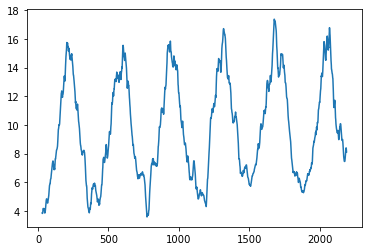

In [11]:
# Media Movil para ConcentracionVapor (mmol/mol) 
concentracionVapor_30 = df['ConcentracionVapor (mmol/mol)'].rolling(window=30).mean();
concentracionVapor_30.plot();

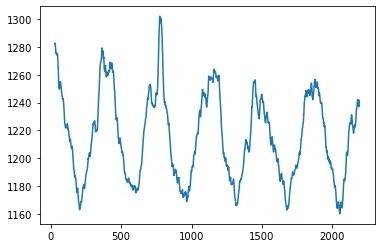

In [12]:
# Media Movil para DensidadAire (g/m**3)
densidadDeAire_30 = df['DensidadAire (g/m**3)'].rolling(window=30).mean();
densidadDeAire_30.plot();

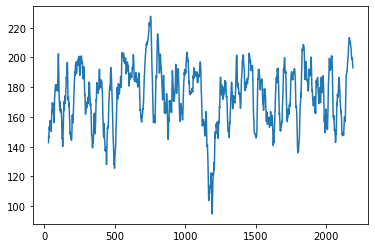

In [13]:
# Media Movil para Direccion Viento
direccionViento_30 = df['DireccionViento (grado)'].rolling(window=30).mean();
direccionViento_30.plot();

0            NaN
1            NaN
2            NaN
3            NaN
          ...   
2189    7.041072
2190    6.896907
2191    6.675009
2192    6.429472
Name: Temperatura (C), Length: 2193, dtype: float64

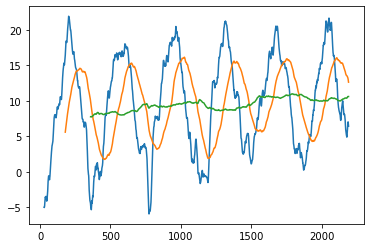

In [29]:
# Media Movil para Direccion Viento
temperatura_30 = df['Temperatura (C)'].rolling(window=30).mean();
temperatura_30.plot();
temperatura_180 = df['Temperatura (C)'].rolling(window=180).mean();
temperatura_180.plot();
temperatura_360 = df['Temperatura (C)'].rolling(window=360).mean();
temperatura_360.plot();

temperatura_30

# Parte 1: Modelos shallow (3 puntos)

Utilizando modelos shallow (por oposición a profundos), desarrolle modelos predictivos que permitan predecir la temperatura del séptimo día siguiente:

- No utilice modelos de forecasting como ARIMA o Holt-Winters
- Establezca variables a partir de los datos históricos. Por ejemplo, puede establecer datos como la temperatura promedio de los últimos 3 días, de los últimos 7 días, de los últimos 10 días, la presión del aire mínima de los últimos 3 días, de los últimos 7 días, de los últimos 15 días, los valores del día anterior de todas las variables, lo valores de hace 1 año en la misma fecha, etc.
- Debe crear un dataset de corte transversal, estimando las variables a utilizar cada día, o cada semana, o cada mes.
- Utilice modelos como SVM y redes neuronales artificiales tradicionales
- Utilice técnicas de seleccion de variables como PCA, LDA y Lasso
- Intente aplicar diferentes técnicas de normalización

# Parte 2: Modelos convolucionales (2 puntos)

Considere los datos como una serie tiempo multivariada y utilice modelos de redes neuronales convolucionales para poder predecir la temperatura del séptimo día siguiente:

- Considere los datos como series de tiempo (no utilice modelos de forecasting como Arima o Holt-Winters, solo redes convolucionales). Debe buscar la mejor ventana de datos que le permita la mejor predicción
- Los datos deben ser transformados entonces en tensores de rango 3: (batch, ventana de tiempo, número de variables a predecir)
- Utilice filtros convolucionales de 1D. Defina una arquitectura con varias convolucionales 1D. Por ejemplo para ventanas de 60 días, se pueden definir en una primera capa 32 kernels de tamaño 3, 5, 7 días.
- Evalúe la utilidad del dropout para regularizar antes de la o las capas densas, intente varios valores.
- Evalúe la utilidad regularizar los kernels de las capas convolucionales con L1 o/y L2, intente varios valores.